## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

We're going to be working with the matplotlib package this week, which is the primary package used to make plots in Python.  pyplot is the part of matplotlib that contains all of the plotting functions that we're going to use. A helpful resource is https://matplotlib.org/2.0.2/api/pyplot_api.html

### Importing files

#### Import two files: 'Homo_sapiens.GRCh38.gene_annotations.txt.gz' and 'deseq_endo_hues.txt.gz'.  You worked with the first file last week; the second file contains the result of differential gene expression analysis between two ENCODE samples:

HUES64 hESC https://www.encodeproject.org/experiments/ENCSR738PHQ/

HUES64 endoderm differentiation https://www.encodeproject.org/experiments/ENCSR002CTR/

Since I'm assuming some of you may be curious - 

Directed differentiation of human ES cells


When human ES cells reached 60–70% confluency on MEFs, the cells were plated as clumps on 6-well plates coated with Matrigel (Life Technologies) in mTeSR1 basal medium (Stem Cell Technologies). We maintained the cells for three days in feeder-free culture and then induced directed differentiation towards mesendoderm, endoderm, mesoderm, and ectoderm using different media conditions. For mesendoderm and endoderm differentiation cells were cultured for 12 and 120 h, respectively, in Roswell Park Memorial Institute (RPMI) medium (Life Technologies) supplemented with 100 ng ml−1 activin A (R&D Systems), 50nM ml−1 WNT3A (R&D Systems), 0.5% FBS (Hyclone), 200 mM GlutaMAX (Life Technologies), 0.2× MEM non-essential amino acids solution (Life Technologies), and 55 µM β-mercaptoethanol. For the first 24 h of mesoderm differentiation, cells were cultured in DMEM/F12 medium supplemented with 100 ng ml−1 activin A (R&D Systems), 10 ng ml−1 bFGF (Millipore), 100 ng ml−1 BMP4 (R&D Systems), 100 ng ml−1 VEGF (R&D Systems), 0.5% FBS (Hyclone), 200 mM GlutaMax (Life Technologies), 0.2× MEM non-essential amino acids solution (Life Technologies), and 55 µM β-mercaptoethanol. From 24 to 120 h of mesoderm differentiation, Activin A was removed from the culture. For ectoderm differentiation cells were cultured in DMEM/F12 medium supplemented with 2 µM TGF-β inhibitor (Tocris, A83-01), 2 µM WNT3A inhibitor (Tocris, PNU-74654), 2 μM dorsomorphin BMP inhibitor (Tocris), 15% KOSR (Life Technologies), 0.2× MEM non-essential amino acids solution (Life Technologies), and 55 µM β-mercaptoethanol. Media was changed daily. Before inducing differentiation, we manually removed the differentiated cell clumps. We routinely obtain greater than 80% differentiated cells based on the presence of the surface marker CD56 (81.7% of mesoderm and 94.4% of ectoderm cells) and greater than 70% differentiated cells based on the surface marker CD184 for endoderm.

from https://www.nature.com/articles/nature14233#methods, cited by https://www.nature.com/articles/nature14248#abstract

In [165]:
path = '/Users/kevin/Stanford/Teaching/STEMREM 201B/homework/wk3/'
figpath = path + 'figures/'

fn_anno = 'Homo_sapiens.GRCh38.gene_annotations.txt.gz'
fn_deseq = 'deseq_endo_hues.txt.gz'

anno = pd.read_csv(path + fn_anno, sep=',', index_col=0)
deseq = pd.read_csv(path + fn_deseq, sep='\t', index_col=0)
anno.head()

,start,end,strand,length,chr,gene_symbol,gene_type,source
gene,,,,,,,,
ENSG00000000003.14,100630765,100637538,-1,6773,X,TSPAN6,protein_coding,cdna
ENSG00000000005.5,100589213,100598708,1,9495,X,TNMD,protein_coding,cdna
ENSG00000000419.12,50935098,50956428,-1,21329,20,DPM1,protein_coding,cdna
ENSG00000000457.13,169853881,169893003,-1,39121,1,SCYL3,protein_coding,cdna
ENSG00000000460.16,169780373,169834072,1,53699,1,C1orf112,protein_coding,cdna


In [166]:
deseq['endo_counts_raw'] = deseq[['ENDO_1_counts_raw','ENDO_2_counts_raw','ENDO_3_counts_raw']].mean(axis=1)
deseq['endo_counts'] = deseq[['ENDO_1_counts_adj','ENDO_2_counts_adj','ENDO_3_counts_adj']].mean(axis=1)

deseq['esc_counts_raw'] = deseq[['HUES_1_counts_raw','HUES_2_counts_raw','HUES_3_counts_raw']].mean(axis=1)
deseq['esc_counts'] = deseq[['HUES_1_counts_adj','HUES_2_counts_adj','HUES_3_counts_adj']].mean(axis=1)

deseq['avg_length'] = deseq[[i for i in deseq.columns if 'avg_length' in i]].mean(axis=1)

deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ENDO_1_counts_raw,ENDO_2_counts_raw,ENDO_3_counts_raw,HUES_1_counts_raw,...,avg_length_ENDO_2,avg_length_ENDO_3,avg_length_HUES_1,avg_length_HUES_2,avg_length_HUES_3,endo_counts_raw,endo_counts,esc_counts_raw,esc_counts,avg_length
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1465,1381,1384,958,...,2052.072786,2052.774492,2058.213562,1991.277457,2034.577187,1410.000000,1183.956122,946.333333,1126.801779,2042.518601
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,2,1,4,22,...,1204.343773,1204.191271,599.131813,718.829919,817.827914,2.333333,1.602214,17.000000,25.286746,893.058748
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,449,473,479,479,...,945.216289,943.116005,925.266749,932.832730,921.734935,467.000000,391.217628,483.333333,576.842374,935.608584
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,227,206,206,115,...,3181.129439,3420.257197,3783.435260,3544.737337,3291.959533,213.000000,184.782827,103.000000,118.050096,3450.560335
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,342,345,374,369,...,2110.424862,2508.974159,1828.002057,2047.636399,2202.322730,353.666667,286.228331,394.666667,488.135614,2122.539351


In [167]:
cols = ['baseMean','log2FoldChange','lfcSE','stat','pvalue','padj',
        'endo_counts','esc_counts','avg_length']

students = deseq[cols]
students.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351


In [168]:
students.to_csv(path + 'deseq_endo_esc_students.txt', sep='\t')

In [169]:
deseq = pd.read_csv(path + 'deseq_endo_esc_students.txt', sep='\t', index_col=0)
deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351


### 1. Let's explore the *counts* values: these are the number of reads that align to each gene, averaged across samples.  Make a scatter plot plotting the count values for ESCs on the x axis, and ENDO on the y axis.  Make the plot using *linear* count values, as well as *log2 transformed counts*.  Label your axes appropriately.

Note that when you're performing a log2 transformation, it's usually helpful to add a *pseudocount* of 1: this is because if a gene has 0 counts, you won't be able to do a log transformation (becasue log of 0 is undefined).  It's also helpful, because log2(1) equals 0 - so your values will all start at 0.  Because we're adding this pseudocount to all values, it won't affect their relative abundances.

Explore with different axes limits (i.e., the range that is shown on the plot) and submit the version containing the limits you think are most useful.

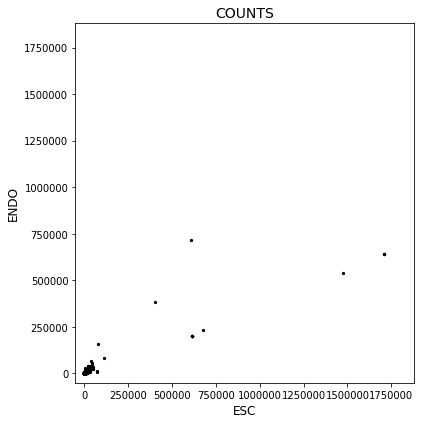

In [184]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

xvals = deseq['esc_counts']
yvals = deseq['endo_counts']

maxes = max(xvals.max(), yvals.max())

ax.scatter(xvals, yvals, c='k', s=5, alpha=1)

ax.set_xlabel('ESC', size=12)
ax.set_ylabel('ENDO', size=12)
ax.set_title('COUNTS', size=14)

ax.set_ylim(-50000, maxes*1.1)
ax.set_xlim(ax.get_ylim())

fig.tight_layout()
plt.show()

fig.savefig(figpath + '1_scatter_counts.png', format='png', dpi=300, bbox_inches='tight')

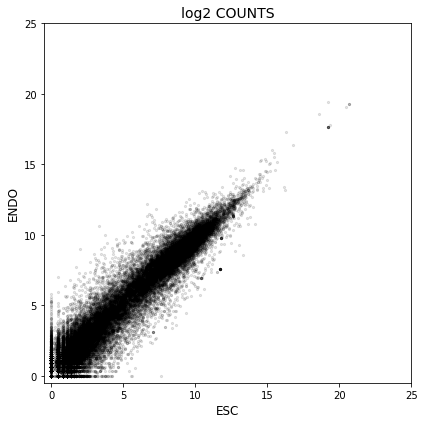

In [185]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

xvals = deseq['esc_counts']
yvals = deseq['endo_counts']

xvals = np.log2(xvals + 1)
yvals = np.log2(yvals + 1)

ax.scatter(xvals, yvals, c='k', s=5, alpha=.1)

ax.set_xlabel('ESC', size=12)
ax.set_ylabel('ENDO', size=12)
ax.set_title('log2 COUNTS', size=14)

ax.set_xlim([-.5, 25])
ax.set_ylim(ax.get_xlim())

fig.tight_layout()
plt.show()

fig.savefig(figpath + '1_scatter_log2counts.png', format='png', dpi=300, bbox_inches='tight')

#### Which of these representations do you think is more useful/informative? Log vs linear counts? Why?

### 2.  Make a histogram of gene counts for the ESC sample.  Again, plot this using both a linear and log scale.  Which is more informative? What do these plots tell you about the distribution of gene expression values? Are they linearly distributed? 

You'll want to explore different *bin* paramters: telling the function how many bins to use for the histogram, and how big each bin should be.  An easy way to make bins is using the np.linspace() and/or np.logspace() functions, which you can then pass into the ax.hist() function as the bins argument.

1708852.45608479
0.0


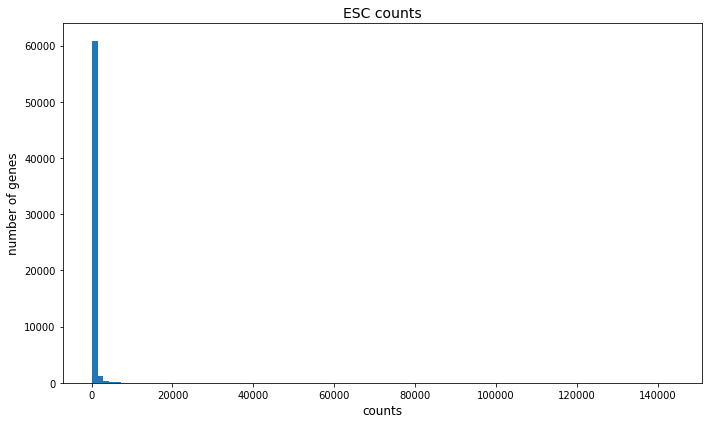

In [186]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

vals = deseq['esc_counts']
print(vals.max())
print(vals.min())

ax.hist(vals, bins=np.linspace(0, 143830, 100))

ax.set_xlabel('counts', size=12)
ax.set_ylabel('number of genes', size=12)
ax.set_title('ESC counts', size=14)

fig.tight_layout()

plt.show()

fig.savefig(figpath + '2_hist_counts.png', format='png', dpi=300, bbox_inches='tight')

20.704597252327318
0.0


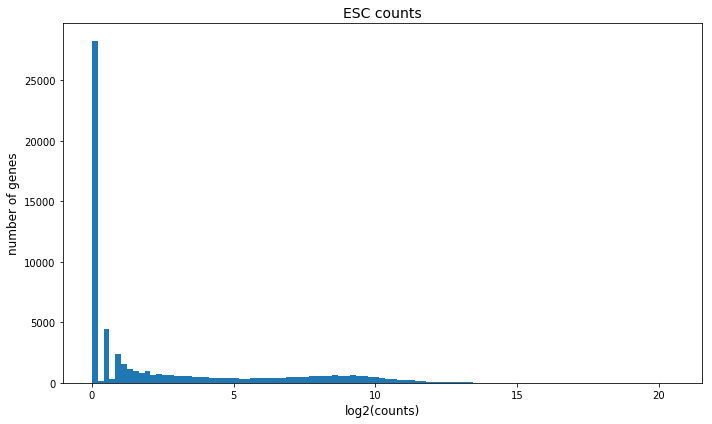

In [187]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

vals = deseq['esc_counts']
vals = np.log2(vals + 1)
print(vals.max())
print(vals.min())

ax.hist(vals, bins=np.linspace(0, 20.5, 100))

ax.set_xlabel('log2(counts)', size=12)
ax.set_ylabel('number of genes', size=12)
ax.set_title('ESC counts', size=14)

fig.tight_layout()
plt.show()

fig.savefig(figpath + '2_hist_log2counts.png', format='png', dpi=300, bbox_inches='tight')

### 3.  Make a histogram comparing the distribution of log2 gene counts for each of the two samples.

Overlay these on the same axis.  You may want to look at the histtype argument, as well as the alpha parameters, and explore which ones you think best display the data. Also include a legend using the ax.legend() command, and label your axes appropriately.

In addition, there's a lot of genes that are zero in both samples: when you plot your histogram, only show genes that have nonzero counts in at least one of the samples (i.e., don't include genes that are zero in both samples).

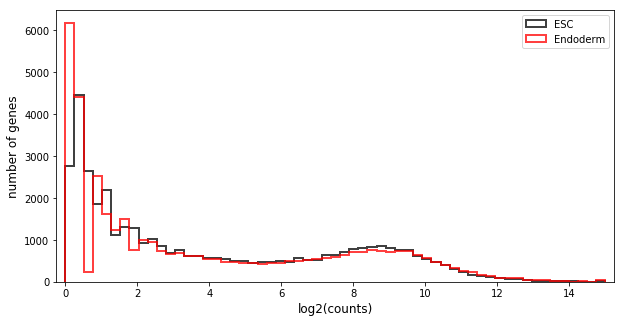

In [188]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

v1 = np.log2(deseq['endo_counts'] + 1)
v2 = np.log2(deseq['esc_counts'] + 1)

m1 = v1 != 0
m2 = v2 != 0
mask = m1 | m2

v1 = v1[mask]
v2 = v2[mask]

v1 = np.clip(v1, 0, 15)
v2 = np.clip(v2, 0, 15)

bins = np.linspace(0, 15, 60)

ax.hist(v1, bins=bins, color='k', histtype='step', alpha=.75, lw=2)
ax.hist(v2, bins=bins, color='r', histtype='step', alpha=.75, lw=2)

ax.legend(['ESC','Endoderm'])

ax.set_xlabel('log2(counts)', size=12)
ax.set_ylabel('number of genes', size=12)
ax.set_xlim([-.25, 15.25])

plt.show()

fig.savefig(figpath + '3_hist_overlay_log2counts.png', format='png', dpi=300, bbox_inches='tight')

#### Why might it be useful to compare these distributions of gene expression values? Do they look roughly aligned? What does that tell us about the two samples?  What is the histograms were not generally similar in terms of their distributions?

### 4.  MA plot

A very common type of plot is a 'MA' plot: in this plot, you plot log mean abudance on the x axis versus log2FC on the y axis.  In this way, you can get a global sense of what the differences between two samples look like.

Make a MA plot for the two samples, and also plot a line along the y=0.

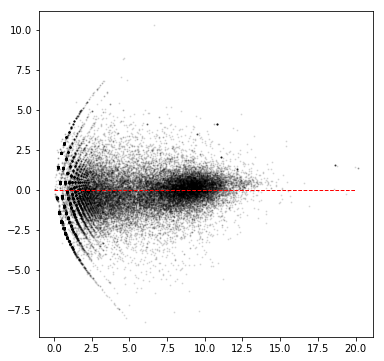

In [189]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = deseq['baseMean']
x = np.log2(x + 1)
y = deseq['log2FoldChange']

ax.scatter(x, y, s=1, c='k', alpha=.1)
ax.plot([0, 20],[0,0],'r--', lw=1)

plt.show()

fig.savefig(figpath + '4_MA.png', format='png', dpi=300, bbox_inches='tight')

#### What is the overall relationship between gene abundance and log2FC ranges? Do more lowly or highly expressed genes have greater or smaller log2FC ranges? What do you think is a good range to cut off analyses when you're looking at gene expression changes, in terms of minimum gene abundance?

### 5.  Volcano Plot

This is another very common way of visualizing the significance of gene expression changes between two samples.  On the x axis, we plot log2FC.  On the y-axis, we plot -log10(adjusted pvalue).  We log transform the value for the same reason we log transform gene expression data (the range is too large to visualize on a linear scale), and take the negative of this value because we want high pvalues, i.e. 1, to be at the bottom, and low pvalues, i.e. close to 0, to be at the top.

Include lines showing a cutoff of log2FC > 1, and pvalue < .05.

Before you plot this - what is the minimum adjusted p value in your dataframe?  A pvalue or adjusted p value of 0 generally indicates that the value was sufficiently small that because of a rounding error, it is stored at 0.

For the genes for which the padj is equal to 0, set it equal to the smallest *nonzero* pvalue.

In [176]:
print(deseq['padj'].min())

0.0


In [177]:
mask = deseq['padj'] != 0
print(deseq.loc[mask, 'padj'].min())

deseq.loc[~mask, 'padj'] = deseq.loc[mask, 'padj'].min()

1.6827050383452681e-298


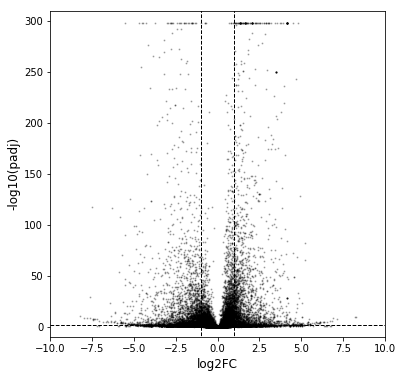

In [190]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = deseq['log2FoldChange']
y = deseq['padj']
y = -np.log10(y)

ax.scatter(x,y, s=1, c='k', alpha=.25)
ax.plot([1, 1],[-50, 400], 'k--', lw=1)
ax.plot([-1, -1],[-50, 400], 'k--', lw=1)
ax.plot([-10, 10],[-np.log10(.05), -np.log10(.05)],  'k--', lw=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 310])

ax.set_xlabel('log2FC', size=12)
ax.set_ylabel('-log10(padj)', size=12)

plt.show()

fig.savefig(figpath + '5_volcano.png', format='png', dpi=300, bbox_inches='tight')

The data says that they sorted CD184 positive cells.  On your volcano plot, highlight the point corresponding to CD184.  Note, you may need to look up the correct gene name in your index - particularly with CD genes, there's often a corresponding gene name.  e.g., CD45 is PTPRC.  You may also need to find out the ENSG ID by looking it up in the annotation dataframe.

ENSG00000121966.6


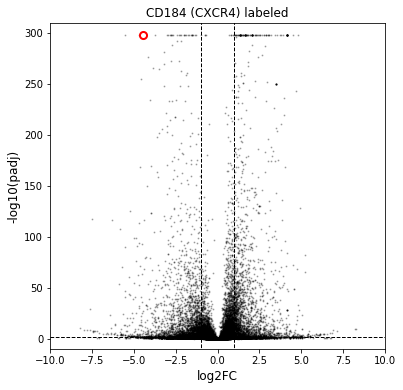

In [192]:
gene = 'CXCR4'
ix = anno.loc[anno['gene_symbol'] == gene].index[0]

print(ix)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = deseq['log2FoldChange']
y = deseq['padj']
y = -np.log10(y)

ax.scatter(x,y, s=1, c='k', alpha=.25)
ax.scatter(x.loc[ix], y.loc[ix], s=50, c='w', alpha=1, edgecolor='r', lw=2)

ax.plot([1, 1],[-50, 400], 'k--', lw=1)
ax.plot([-1, -1],[-50, 400], 'k--', lw=1)
ax.plot([-10, 10],[-np.log10(.05), -np.log10(.05)],  'k--', lw=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 310])

ax.set_xlabel('log2FC', size=12)
ax.set_ylabel('-log10(padj)', size=12)
ax.set_title('CD184 (CXCR4) labeled', size=12)

plt.show()

fig.savefig(figpath + '5_volcano_labeled.png', format='png', dpi=300, bbox_inches='tight')

### 6.  Bar plot of the number of genes per chromosome

Make a plot showing the number of genes expressed on each chromosome (only 1-22, X, Y). Order the x axis from 1-22, X, Y.

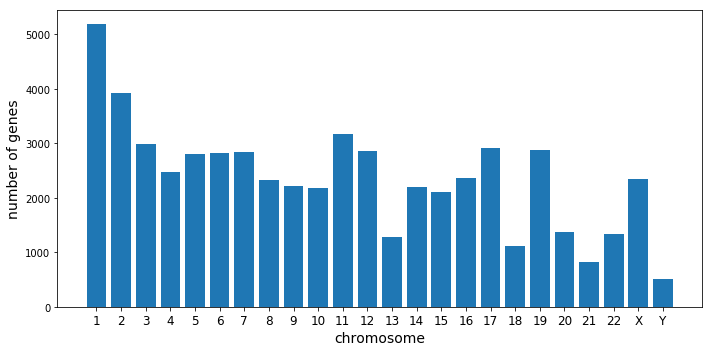

In [193]:
from collections import Counter

chr_counts = Counter(anno['chr'])

chrs = [str(i) for i in range(1, 23)] + ['X','Y']
yvals = [chr_counts[i] for i in chrs]
xvals = np.arange(len(yvals))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(xvals, yvals)

ax.set_xticks(xvals)
ax.set_xticklabels(chrs, size=12)

ax.set_xlabel('chromosome', size=14)
ax.set_ylabel('number of genes', size=14)

fig.tight_layout()
plt.show()

fig.savefig(figpath + '6_bar_genes-per-chromosome.png', format='png', dpi=300, bbox_inches='tight')

### 5.  Box plot of gene expression values in ES cells, grouped by chromosome.

1.  Compute TPM values from the counts values for the ESC_counts.  Do this by 1) taking the counts, divided by the average length; 2) dividing this by the sum of the length-normalized counts, and 3) multiplying by 1,000,000.  This reults in the transcripts per million, which is the counts, normalized by length, normalized by sequencing depth.  Add this as a new column to your dataframe.

2.  Make a list of chromosomes.  Make a second empty list.  Iterate through the chromosomes, get only the genes that are on that chromosome.  And then get the associated tpm values.  Note that you'll need to use the annotation and deseq dataframes for this.

3.  Make the box plot.

In [22]:
deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351


In [195]:
esc_counts = deseq['esc_counts'] + 1
norm_length = esc_counts / deseq['avg_length']
norm_length_size = 1000000 * norm_length / norm_length.sum()
deseq['esc_tpm'] = norm_length_size

endo_counts = deseq['endo_counts'] + 1
norm_length = endo_counts / deseq['avg_length']
norm_length_size = 1000000 * norm_length / norm_length.sum()
deseq['endo_tpm'] = norm_length_size

deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length,esc_tpm,endo_tpm
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601,3.739914,10.843530
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748,0.199366,0.054462
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584,4.183214,7.835512
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335,0.233687,1.006353
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351,1.560876,2.529333


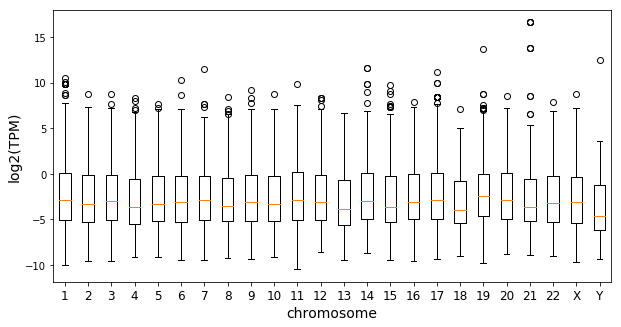

In [196]:
chrs = [str(i) for i in range(1, 23)] + ['X','Y']
tpm_vals = []

for i in chrs:
    m1 = anno['chr'] == i
    m2 = deseq['esc_counts'] > 0
    mask = m1 & m2
    vals = deseq.loc[mask, 'esc_tpm']
    vals = np.log2(vals)
    tpm_vals += [vals.values]
    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

xvals = np.arange(len(tpm_vals))

ax.boxplot(tpm_vals, positions=xvals)

ax.set_xticks(xvals)
ax.set_xticklabels(chrs, size=12)
ax.set_xlabel('chromosome', size=14)
ax.set_ylabel('log2(TPM)', size=14)

plt.show()

fig.savefig(figpath + '7_boxplot_tpm-per-chromosome.png', format='png', dpi=300, bbox_inches='tight')

#### How long did everything take you?  Any comments/suggestions?